In [ ]:
from datetime import datetime
import pandas as pd
from matplotlib import pyplot as plt


# read in the data under data/in-use/unscaled_train_data.csv

day = pd.read_csv('../data/clean/trading_prices_01102018_01012023.csv')
day['DateTime'] = pd.to_datetime(day['Date'] + ' ' + day['Start'], format='%d.%m.%Y %H:%M')
day.sort_values(by='DateTime', inplace=True)

In [ ]:
target_col = 'Deutschland/Luxemburg [€/MWh] Original resolutions'
day[target_col] = day[target_col].str.replace(',', '.').astype(float)
day["Time"] = day["DateTime"].dt.strftime("%H:%M")

In [ ]:
grouped_by_hour = day.groupby(day['DateTime'].dt.hour)
average_price_per_hour = grouped_by_hour[target_col].mean()

In [ ]:
# Calculate the 95th and 5th percentiles
percentile_95 = grouped_by_hour[target_col].quantile(0.95)
percentile_5 = grouped_by_hour[target_col].quantile(0.05)

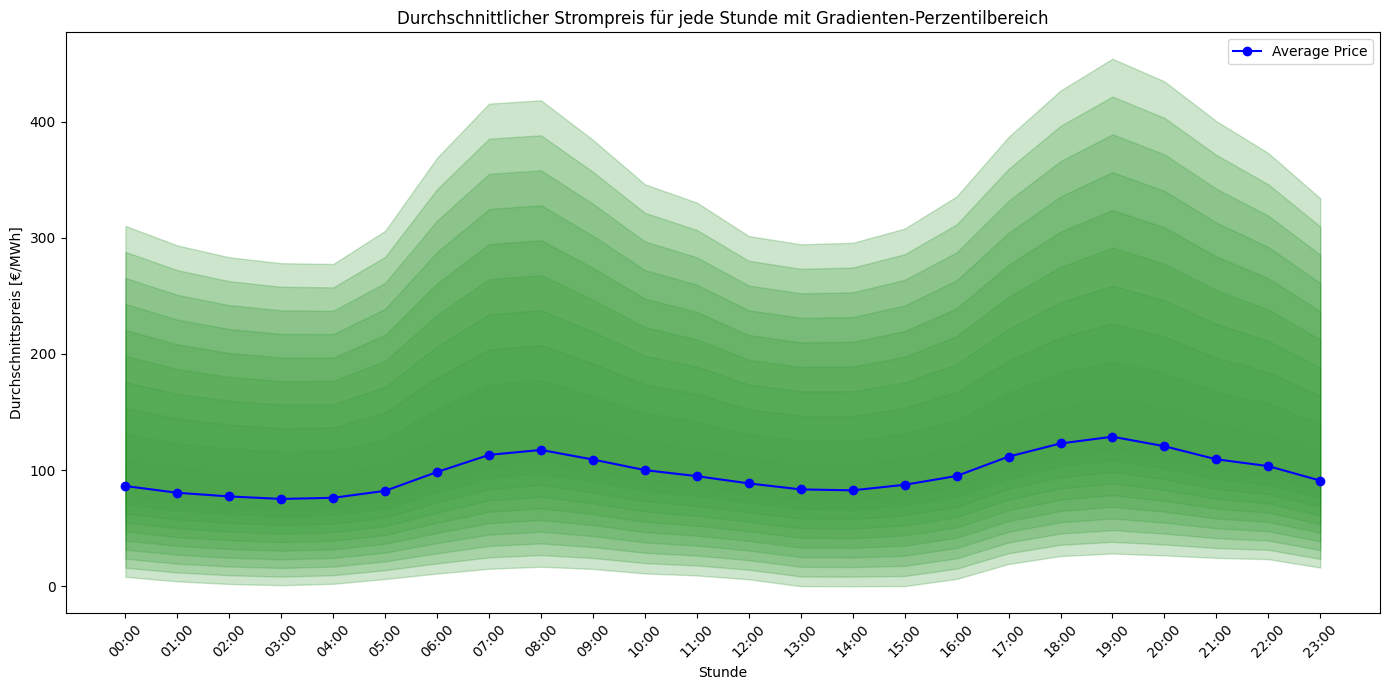

In [20]:
# Prepare the plot
plt.figure(figsize=(14, 7))

x_axis_labels = [f"{hour:02d}:00" for hour in range(24)]
plt.plot(x_axis_labels, average_price_per_hour, label='Average Price', color='blue', marker='o')
# Create gradient fills
number_of_bands = 10  # This will create 10 bands on each side of the mean for the gradient
for i in range(1, number_of_bands + 1):
    alpha_value = (1 / number_of_bands) * i  # Gradually increasing alpha value
    percentile_range_higher = average_price_per_hour + (percentile_95 - average_price_per_hour) * (i / number_of_bands)
    percentile_range_lower = average_price_per_hour - (average_price_per_hour - percentile_5) * (i / number_of_bands)
    plt.fill_between(x_axis_labels, percentile_range_lower, percentile_range_higher, color='green', alpha=alpha_value * 0.2)

plt.title('Durchschnittlicher Strompreis für jede Stunde mit Gradienten-Perzentilbereich')
plt.xlabel('Stunde')
plt.ylabel('Durchschnittspreis [€/MWh]')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of datetime labels
plt.savefig('../plots/avg_price.svg', format='svg', dpi=1200)
plt.show()